# Курсовой проект по дисциплине "Вычислительная математика"(XIII.11.1)

# Постановка задачи:
Здесь рассмотрена более общая задача, по сравнению с XIII.11.1 (из задачника Аристовой Е.Н., Лобанова А.И.).
Для аппроксимации уравнения $$ \frac{\partial u}{\partial t}=\frac{\partial}{\partial x }a u^\alpha\frac{\partial u}{\partial x}+q(x)$$ $$ -\alpha_1 u_x(0,t) + \beta_1 u(0,t)=f_1(t) $$ $$ \alpha_2 u_x(X,t) + \beta_2 u(X,t)=f_2(t) $$ $$ u(x,0)=g(x), $$ $$ \alpha_i \geqslant 0, \beta_i \geqslant 0, \alpha_i+\beta_i > 0, i = 1,2 $$
используется следующая разностная схема $$ \frac{y^{n+1}_m - y^{n}_{m}}{\tau} = \frac{1}{h}(k_{m+\frac{1}{2}}\frac{y^{n+1}_{m+1} - y^{n+1}_{m}}{h} - k_{m-\frac{1}{2}}\frac{y^{n+1}_{m} - y^{n+1}_{m-1}}{h}) $$

Предлагается использовать различные способы определения $ k_{m+\frac{1}{2}} $:

$$
1) \quad k_{m+\frac{1}{2}} = \frac{a}{2} ({y^{n}_{m}}^\alpha + {y^{n}_{m+1}}^\alpha)\\
2) \quad k_{m+\frac{1}{2}} = a(\frac{{y^{n}_{m}} + {y^{n}_{m+1}}}{2})^\alpha\\
3) \quad k_{m+\frac{1}{2}} = a(\frac{2{y^{n}_{m}} {y^{n}_{m+1}}}{{y^{n}_{m}}+{y^{n}_{m+1}}})^\alpha\\
4) \quad k_{m+\frac{1}{2}} = 2a(\frac{{y^{n}_{m}}^\alpha {y^{n}_{m+1}}^\alpha}{{y^{n}_{m}}^\alpha+{y^{n}_{m+1}}^\alpha})\\
$$ 

Какой из вариантов предпочтительнее? Почему не работают в окрестности фронта средние гармонические — 3) и 4)?
Реализовать схемы 1) и 2), сравнить численное решение с точным. Почему при больших значениях $\frac{\tau}{h^2}$ наблюдается отставание фронта волны в численном решении от точного значения?

# Решение

## 1.Ответы на вопросы задачи
Первым шагом было получено, что рассматриваемая явная схема является устойчивой при выполнении условия: 
$$ h^2 \geqslant \tau(k_{m+\frac{1}{2}} + k_{m-\frac{1}{2}})$$
Благодаря тому, что мы считаем неявную четырехточечную схему, данное условие не является строгим ограничением на выбор шага. Более того, принцип замороженных коэффициентов дает устойчивость такой схемы при любых числах Куранта. $$$$
Средние гармонические 3 и 4 не работают в окрестности фронта, так как перед фронтом $u(x,t)=0$ и, следовательно, вычисления могут быть некорректны из-за знаменателя. Более предпочтительным является 1й способ подсчета благодаря его универсальности по сравнению с 3 и 4 и более точному расчету по сравнению со 2. При больших значениях $\frac{\tau}{h^2}$ наблюдается отставание фронта волны в численном решении от точного значения. Это происходит из-за того, что большое число Куранта не обеспечивает точности в передаче временной эволюции коэффициентов Фурье решения уравнения.

## 2. Реализация алгоритма расчета

Аппроксимация начальных данных: $$ y_m^0=g(x_m), m = 0,1,..,M $$
Аппроксимация двух краевых условий: $$\alpha_1\frac{y_1^n-y_0^n}{h}+\beta_1y_0^n=f_1(t_n), n = 1,2,..,N $$
$$ \alpha_2\frac{y_M^n-y_{M-1}^n}{h}+\beta_2y_M^n=f_2(t_n), n = 1,2,..,N $$
Здесь для удобства расчетов выполнена замена $-\alpha_1 \rightarrow \alpha_1$.

С учетом разностной схемы $$ \frac{y^{n+1}_m - y^{n}_{m}}{\tau} = \frac{1}{h}(k_{m+\frac{1}{2}}\frac{y^{n+1}_{m+1} - y^{n+1}_{m}}{h} - k_{m-\frac{1}{2}}\frac{y^{n+1}_{m} - y^{n+1}_{m-1}}{h}) + q_m^{n} $$ на каждом из N слоев мы имеем M+1 уравнение на M+1 неизвестную. Несложно заметить, что матрица такой системы трехдиагональная, следовательно, можно применить метод прогонки.
Опишем принцип расчета в общем случае. Пусть мы привели систему к виду:
$$ Ay=f $$
$$
\left(
\begin{array}{cccc}
c_{0} & -b_{0} & 0 &\ldots & 0\\
-a_{1} & c_{1} & -b_{1} & \ldots & 0\\
\vdots & \vdots & \vdots & \ddots & -b_{M-1}\\
0 & \ldots& 0 & -a_{M} & c_{M}
\end{array}
\right)
\left(
\begin{array}{cccc}
y_{0}\\
y_{1}\\
\vdots\\
y_{M}
\end{array}
\right)
=
\left(
\begin{array}{cccc}
f_{0}\\
f_{1}\\
\vdots\\
f_{M}
\end{array}
\right)
$$

Прямым ходом прогонки вычисляем прогоночные коэффициенты:
$$
\alpha_1 = \frac{b_0}{c_0}\\
\beta_1 = \frac{f_0}{c_0}\\
\alpha_{i+1} = \frac{b_i}{c_i-a_i\alpha_i}, i = 1,2,..,M-1\\
\beta_{i+1} = \frac{f_i+a_i\beta_i}{c_i-a_i\alpha_i}, i = 1,2,..,M\\
$$
Обратным ходом прогонки вычисляем решение:
$$
y_M=\beta_{M+1}\\
y_i=\alpha_{i+1}y_{i+1}+\beta_{i+1}, i=M−1,M−2,..,0
$$

И так решаем систему N раз. Ниже представлены полученные расчетные формулы:

$$
y_0^n(\beta_1-\frac{\alpha_1}{h})+y_1^n\frac{\alpha_1}{h}=f_1(t_n)\\
y_{m-1}^{n+1}\frac{k_{m-\frac{1}{2}}}{h^2}-y_m^{n+1}(\frac{k_{m+\frac{1}{2}}+k_{m-\frac{1}{2}}}{h^2}+\frac{1}{\tau})+y_{m+1}^{n+1}\frac{k_{m+\frac{1}{2}}}{h^2}=-\frac{y_m^n}{\tau}-q(x_m,t_n)\\
y_{M-1}^n(-\frac{\alpha_2}{h})+y_M^n(\frac{\alpha_2}{h}+\beta_2)=f_2(t_n)\\
$$

#### Замечание: 
применение в данном случае стандартных библиотек для решения систем уравнений сильно замедлит скорость работы программы.

In [1]:
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d

class Solution:
    def __init__(self, x_new, t_new):
        self.x = x_new
        self.t = t_new
        self.u = 0.0
    
    def print_solution(self):
        print('u(' , self.x , ', ' , self.t ,') =' , self.u)

#Определили 1 и 2 варианты вычисления коэффициентов k
def k1(y, y_next):
    return a/2.0*(y**alpha+y_next**alpha)
def k2(y, y_next):
    return a*((y+y_next)/2.0)**alpha
def k3(y, y_next):
    if(y+y_next == 0):
        return 0
    return a*(2*y*y_next/(y+y_next))**alpha
def k4(y, y_next):
    denomin = y**alpha+y_next**alpha
    if(denomin == 0):
        return 0
    return 2*a*((y*y_next)**alpha)/denomin

def solve_equation(t_n, x_n, t_step, x_step, n, n_steps):
    t_left = 0
    x_left = 0
    t_right = t_left+t_step*t_n
    x_right = x_left+x_step*x_n
    #Определили расчетную сетку
    solution = []
    for j in np.arange(t_left,t_right + t_step,t_step):
        sol_temp = []
        for i in np.arange(x_left,x_right + x_step,x_step):
            sol_temp.append(Solution(i,j))
        solution.append(sol_temp)

    #Задали начальные данные
    for i in np.arange(0, t_n+1):
        solution[i][0].u = f1(t_left+i*t_step)
        solution[i][x_n].u = f2(t_left+i*t_step)
    for i in np.arange(0, x_n+1):
        solution[0][i].u = g(x_left+i*x_step)


    for i in np.arange(1, t_n+1):
        #Прямой ход прогонки
        coefs1 = []
        coefs2 = []
        coefs1.append(-(alpha1/x_step)/(beta1-alpha1/x_step))
        coefs2.append(f1(i*t_step)/(beta1-alpha1/x_step))
        
        if(n == 1):
            for j in np.arange(1,x_n):
                coefs1.append(-(k1(solution[i-1][j].u,solution[i-1][j+1].u)/x_step**2)/
                              (-(k1(solution[i-1][j].u,solution[i-1][j+1].u)+k1(solution[i-1][j].u,solution[i-1][j-1].u))/
                               x_step**2-1/t_step + k1(solution[i-1][j].u,solution[i-1][j-1].u)/x_step**2*coefs1[-1]))

                coefs2.append((-solution[i-1][j].u/t_step-q(t_left+(i-1)*t_step,x_left+j*x_step)-
                               k1(solution[i-1][j].u,solution[i-1][j-1].u)/x_step**2*coefs2[-1])/
                              (-(k1(solution[i-1][j].u,solution[i-1][j+1].u)+k1(solution[i-1][j].u,solution[i-1][j-1].u))/
                               x_step**2-1/t_step + k1(solution[i-1][j].u,solution[i-1][j-1].u)/x_step**2*coefs1[-2]))
        elif(n == 2):
            for j in np.arange(1,x_n):
                coefs1.append(-(k2(solution[i-1][j].u,solution[i-1][j+1].u)/x_step**2)/
                              (-(k2(solution[i-1][j].u,solution[i-1][j+1].u)+k2(solution[i-1][j].u,solution[i-1][j-1].u))/
                               x_step**2-1/t_step + k2(solution[i-1][j].u,solution[i-1][j-1].u)/x_step**2*coefs1[-1]))

                coefs2.append((-solution[i-1][j].u/t_step-q(t_left+(i-1)*t_step,x_left+j*x_step)-
                               k2(solution[i-1][j].u,solution[i-1][j-1].u)/x_step**2*coefs2[-1])/
                              (-(k2(solution[i-1][j].u,solution[i-1][j+1].u)+k2(solution[i-1][j].u,solution[i-1][j-1].u))/
                               x_step**2-1/t_step + k2(solution[i-1][j].u,solution[i-1][j-1].u)/x_step**2*coefs1[-2]))
        elif(n == 3):
            for j in np.arange(1,x_n):
                coefs1.append(-(k3(solution[i-1][j].u,solution[i-1][j+1].u)/x_step**2)/
                              (-(k3(solution[i-1][j].u,solution[i-1][j+1].u)+k3(solution[i-1][j].u,solution[i-1][j-1].u))/
                               x_step**2-1/t_step + k3(solution[i-1][j].u,solution[i-1][j-1].u)/x_step**2*coefs1[-1]))

                coefs2.append((-solution[i-1][j].u/t_step-q(t_left+(i-1)*t_step,x_left+j*x_step)-
                               k3(solution[i-1][j].u,solution[i-1][j-1].u)/x_step**2*coefs2[-1])/
                              (-(k3(solution[i-1][j].u,solution[i-1][j+1].u)+k3(solution[i-1][j].u,solution[i-1][j-1].u))/
                               x_step**2-1/t_step + k3(solution[i-1][j].u,solution[i-1][j-1].u)/x_step**2*coefs1[-2]))
        elif(n == 4):
            for j in np.arange(1,x_n):
                coefs1.append(-(k4(solution[i-1][j].u,solution[i-1][j+1].u)/x_step**2)/
                              (-(k4(solution[i-1][j].u,solution[i-1][j+1].u)+k4(solution[i-1][j].u,solution[i-1][j-1].u))/
                               x_step**2-1/t_step + k4(solution[i-1][j].u,solution[i-1][j-1].u)/x_step**2*coefs1[-1]))

                coefs2.append((-solution[i-1][j].u/t_step-q(t_left+(i-1)*t_step,x_left+j*x_step)-
                               k4(solution[i-1][j].u,solution[i-1][j-1].u)/x_step**2*coefs2[-1])/
                              (-(k4(solution[i-1][j].u,solution[i-1][j+1].u)+k4(solution[i-1][j].u,solution[i-1][j-1].u))/
                               x_step**2-1/t_step + k4(solution[i-1][j].u,solution[i-1][j-1].u)/x_step**2*coefs1[-2]))
        

        coefs2.append((f2(t_left+i*t_step)+alpha2/x_step*coefs2[-1]) / (alpha2/x_step+beta2-alpha2/x_step*coefs1[-1]))

        #Обратный ход прогонки
        solution[i][x_n].u = coefs2[-1]
        for j in np.arange(1,x_n):
            solution[i][x_n-j].u = solution[i][x_n-j+1].u*coefs1[-j]+coefs2[-1-j]
            
        #Расчет через коэффициент теплопроводности с верхнего слоя
        for t in np.arange(0,n_steps):
            #Прямой ход прогонки
            coefs1 = []
            coefs2 = []
            coefs1.append(-(alpha1/x_step)/(beta1-alpha1/x_step))
            coefs2.append(f1(i*t_step)/(beta1-alpha1/x_step))

            if(n == 1):
                for j in np.arange(1,x_n):
                    coefs1.append(-(k1(solution[i][j].u,solution[i][j+1].u)/x_step**2)/
                                  (-(k1(solution[i][j].u,solution[i][j+1].u)+k1(solution[i][j].u,solution[i][j-1].u))/
                                   x_step**2-1/t_step + k1(solution[i][j].u,solution[i][j-1].u)/x_step**2*coefs1[-1]))

                    coefs2.append((-solution[i-1][j].u/t_step-q(t_left+(i)*t_step,x_left+j*x_step)-
                                   k1(solution[i][j].u,solution[i][j-1].u)/x_step**2*coefs2[-1])/
                                  (-(k1(solution[i][j].u,solution[i][j+1].u)+k1(solution[i][j].u,solution[i][j-1].u))/
                                   x_step**2-1/t_step + k1(solution[i][j].u,solution[i][j-1].u)/x_step**2*coefs1[-2]))
            elif(n == 2):
                for j in np.arange(1,x_n):
                    coefs1.append(-(k2(solution[i][j].u,solution[i][j+1].u)/x_step**2)/
                                  (-(k2(solution[i][j].u,solution[i][j+1].u)+k2(solution[i][j].u,solution[i][j-1].u))/
                                   x_step**2-1/t_step + k2(solution[i][j].u,solution[i][j-1].u)/x_step**2*coefs1[-1]))

                    coefs2.append((-solution[i-1][j].u/t_step-q(t_left+(i)*t_step,x_left+j*x_step)-
                                   k2(solution[i][j].u,solution[i][j-1].u)/x_step**2*coefs2[-1])/
                                  (-(k2(solution[i][j].u,solution[i][j+1].u)+k2(solution[i][j].u,solution[i][j-1].u))/
                                   x_step**2-1/t_step + k2(solution[i][j].u,solution[i][j-1].u)/x_step**2*coefs1[-2]))
            elif(n == 3):
                for j in np.arange(1,x_n):
                    coefs1.append(-(k3(solution[i][j].u,solution[i][j+1].u)/x_step**2)/
                                  (-(k3(solution[i][j].u,solution[i][j+1].u)+k3(solution[i][j].u,solution[i][j-1].u))/
                                   x_step**2-1/t_step + k3(solution[i][j].u,solution[i][j-1].u)/x_step**2*coefs1[-1]))

                    coefs2.append((-solution[i-1][j].u/t_step-q(t_left+(i)*t_step,x_left+j*x_step)-
                                   k3(solution[i][j].u,solution[i][j-1].u)/x_step**2*coefs2[-1])/
                                  (-(k3(solution[i][j].u,solution[i][j+1].u)+k3(solution[i][j].u,solution[i][j-1].u))/
                                   x_step**2-1/t_step + k3(solution[i][j].u,solution[i][j-1].u)/x_step**2*coefs1[-2]))
            elif(n == 4):
                for j in np.arange(1,x_n):
                    coefs1.append(-(k4(solution[i][j].u,solution[i][j+1].u)/x_step**2)/
                                  (-(k4(solution[i][j].u,solution[i][j+1].u)+k4(solution[i][j].u,solution[i][j-1].u))/
                                   x_step**2-1/t_step + k4(solution[i][j].u,solution[i][j-1].u)/x_step**2*coefs1[-1]))

                    coefs2.append((-solution[i-1][j].u/t_step-q(t_left+(i)*t_step,x_left+j*x_step)-
                                   k4(solution[i][j].u,solution[i][j-1].u)/x_step**2*coefs2[-1])/
                                  (-(k4(solution[i][j].u,solution[i][j+1].u)+k4(solution[i][j].u,solution[i][j-1].u))/
                                   x_step**2-1/t_step + k4(solution[i][j].u,solution[i][j-1].u)/x_step**2*coefs1[-2]))


            coefs2.append((f2(t_left+i*t_step)+alpha2/x_step*coefs2[-1]) / (alpha2/x_step+beta2-alpha2/x_step*coefs1[-1]))

            #Обратный ход прогонки
            solution[i][x_n].u = coefs2[-1]
            for j in np.arange(1,x_n):
                solution[i][x_n-j].u = solution[i][x_n-j+1].u*coefs1[-j]+coefs2[-1-j]
    
    return solution

def solve_equation_crank_nicolson(t_n, x_n, t_step, x_step, n, n_steps, ksi):
    t_left = 0
    x_left = 0
    t_right = t_left+t_step*t_n
    x_right = x_left+x_step*x_n
    #Определили расчетную сетку
    solution = []
    for j in np.arange(t_left,t_right + t_step,t_step):
        sol_temp = []
        for i in np.arange(x_left,x_right + x_step,x_step):
            sol_temp.append(Solution(i,j))
        solution.append(sol_temp)

    #Задали начальные данные
    for i in np.arange(0, t_n+1):
        solution[i][0].u = f1(t_left+i*t_step)
        solution[i][x_n].u = f2(t_left+i*t_step)
    for i in np.arange(0, x_n+1):
        solution[0][i].u = g(x_left+i*x_step)


    for i in np.arange(1, t_n+1):
        #Прямой ход прогонки
        coefs1 = []
        coefs2 = []
        coefs1.append(-(alpha1/x_step)/(beta1-alpha1/x_step))
        coefs2.append(f1(i*t_step)/(beta1-alpha1/x_step))
        
        if(n == 1):
            for j in np.arange(1,x_n):
                coefs1.append(-(k1(solution[i-1][j].u,solution[i-1][j+1].u)/x_step**2)/
                              (-(k1(solution[i-1][j].u,solution[i-1][j+1].u)+k1(solution[i-1][j].u,solution[i-1][j-1].u))/
                               x_step**2-1/t_step + k1(solution[i-1][j].u,solution[i-1][j-1].u)/x_step**2*coefs1[-1]))

                coefs2.append((-solution[i-1][j].u/t_step-q(t_left+(i-1)*t_step,x_left+j*x_step)-
                               k1(solution[i-1][j].u,solution[i-1][j-1].u)/x_step**2*coefs2[-1])/
                              (-(k1(solution[i-1][j].u,solution[i-1][j+1].u)+k1(solution[i-1][j].u,solution[i-1][j-1].u))/
                               x_step**2-1/t_step + k1(solution[i-1][j].u,solution[i-1][j-1].u)/x_step**2*coefs1[-2]))
        elif(n == 2):
            for j in np.arange(1,x_n):
                coefs1.append(-(k2(solution[i-1][j].u,solution[i-1][j+1].u)/x_step**2)/
                              (-(k2(solution[i-1][j].u,solution[i-1][j+1].u)+k2(solution[i-1][j].u,solution[i-1][j-1].u))/
                               x_step**2-1/t_step + k2(solution[i-1][j].u,solution[i-1][j-1].u)/x_step**2*coefs1[-1]))

                coefs2.append((-solution[i-1][j].u/t_step-q(t_left+(i-1)*t_step,x_left+j*x_step)-
                               k2(solution[i-1][j].u,solution[i-1][j-1].u)/x_step**2*coefs2[-1])/
                              (-(k2(solution[i-1][j].u,solution[i-1][j+1].u)+k2(solution[i-1][j].u,solution[i-1][j-1].u))/
                               x_step**2-1/t_step + k2(solution[i-1][j].u,solution[i-1][j-1].u)/x_step**2*coefs1[-2]))
        elif(n == 3):
            for j in np.arange(1,x_n):
                coefs1.append(-(k3(solution[i-1][j].u,solution[i-1][j+1].u)/x_step**2)/
                              (-(k3(solution[i-1][j].u,solution[i-1][j+1].u)+k3(solution[i-1][j].u,solution[i-1][j-1].u))/
                               x_step**2-1/t_step + k3(solution[i-1][j].u,solution[i-1][j-1].u)/x_step**2*coefs1[-1]))

                coefs2.append((-solution[i-1][j].u/t_step-q(t_left+(i-1)*t_step,x_left+j*x_step)-
                               k3(solution[i-1][j].u,solution[i-1][j-1].u)/x_step**2*coefs2[-1])/
                              (-(k3(solution[i-1][j].u,solution[i-1][j+1].u)+k3(solution[i-1][j].u,solution[i-1][j-1].u))/
                               x_step**2-1/t_step + k3(solution[i-1][j].u,solution[i-1][j-1].u)/x_step**2*coefs1[-2]))
        elif(n == 4):
            for j in np.arange(1,x_n):
                coefs1.append(-(k4(solution[i-1][j].u,solution[i-1][j+1].u)/x_step**2)/
                              (-(k4(solution[i-1][j].u,solution[i-1][j+1].u)+k4(solution[i-1][j].u,solution[i-1][j-1].u))/
                               x_step**2-1/t_step + k4(solution[i-1][j].u,solution[i-1][j-1].u)/x_step**2*coefs1[-1]))

                coefs2.append((-solution[i-1][j].u/t_step-q(t_left+(i-1)*t_step,x_left+j*x_step)-
                               k4(solution[i-1][j].u,solution[i-1][j-1].u)/x_step**2*coefs2[-1])/
                              (-(k4(solution[i-1][j].u,solution[i-1][j+1].u)+k4(solution[i-1][j].u,solution[i-1][j-1].u))/
                               x_step**2-1/t_step + k4(solution[i-1][j].u,solution[i-1][j-1].u)/x_step**2*coefs1[-2]))
        

        coefs2.append((f2(t_left+i*t_step)+alpha2/x_step*coefs2[-1]) / (alpha2/x_step+beta2-alpha2/x_step*coefs1[-1]))

        #Обратный ход прогонки
        solution[i][x_n].u = coefs2[-1]
        for j in np.arange(1,x_n):
            solution[i][x_n-j].u = solution[i][x_n-j+1].u*coefs1[-j]+coefs2[-1-j]
            
        #Расчет через коэффициент теплопроводности с верхнего слоя
        for t in np.arange(0,n_steps):
            #Прямой ход прогонки
            coefs1 = []
            coefs2 = []
            coefs1.append(-(alpha1/x_step)/(beta1-alpha1/x_step))
            coefs2.append(f1(i*t_step)/(beta1-alpha1/x_step))

            if(n == 1):
                for j in np.arange(1,x_n):
                    k_next = k1(solution[i-1][j].u,solution[i-1][j+1].u)
                    k_prev = k1(solution[i-1][j].u,solution[i-1][j-1].u)
                    
                    b_i = -ksi*(k1(solution[i][j].u,solution[i][j+1].u)/x_step**2)
                    c_i = -ksi*(k1(solution[i][j].u,solution[i][j+1].u)+k1(solution[i][j].u,solution[i][j-1].u))/x_step**2-1/t_step
                    a_i =  -ksi*k1(solution[i][j].u,solution[i][j-1].u)/x_step**2
                    f_i = (-solution[i-1][j].u/t_step-ksi*q(t_left+(i)*t_step,x_left+j*x_step)
                           -(1-ksi)*q(t_left+(i-1)*t_step,x_left+j*x_step)
                           -(1-ksi)*(k_next*(solution[i-1][j+1].u-solution[i-1][j].u)
                                     -k_prev*(solution[i-1][j].u-solution[i-1][j-1].u))/x_step**2)
                    coefs1.append(b_i/(c_i - a_i*coefs1[-1]))
                    coefs2.append((f_i+a_i*coefs2[-1])/(c_i - a_i*coefs1[-2]))
            elif(n == 2):
                for j in np.arange(1,x_n):
                    coefs1.append(-(k2(solution[i][j].u,solution[i][j+1].u)/x_step**2)/
                                  (-(k2(solution[i][j].u,solution[i][j+1].u)+k2(solution[i][j].u,solution[i][j-1].u))/
                                   x_step**2-1/t_step + k2(solution[i][j].u,solution[i][j-1].u)/x_step**2*coefs1[-1]))

                    coefs2.append((-solution[i-1][j].u/t_step-q(t_left+(i)*t_step,x_left+j*x_step)-
                                   k2(solution[i][j].u,solution[i][j-1].u)/x_step**2*coefs2[-1])/
                                  (-(k2(solution[i][j].u,solution[i][j+1].u)+k2(solution[i][j].u,solution[i][j-1].u))/
                                   x_step**2-1/t_step + k2(solution[i][j].u,solution[i][j-1].u)/x_step**2*coefs1[-2]))
            elif(n == 3):
                for j in np.arange(1,x_n):
                    coefs1.append(-(k3(solution[i][j].u,solution[i][j+1].u)/x_step**2)/
                                  (-(k3(solution[i][j].u,solution[i][j+1].u)+k3(solution[i][j].u,solution[i][j-1].u))/
                                   x_step**2-1/t_step + k3(solution[i][j].u,solution[i][j-1].u)/x_step**2*coefs1[-1]))

                    coefs2.append((-solution[i-1][j].u/t_step-q(t_left+(i)*t_step,x_left+j*x_step)-
                                   k3(solution[i][j].u,solution[i][j-1].u)/x_step**2*coefs2[-1])/
                                  (-(k3(solution[i][j].u,solution[i][j+1].u)+k3(solution[i][j].u,solution[i][j-1].u))/
                                   x_step**2-1/t_step + k3(solution[i][j].u,solution[i][j-1].u)/x_step**2*coefs1[-2]))
            elif(n == 4):
                for j in np.arange(1,x_n):
                    coefs1.append(-(k4(solution[i][j].u,solution[i][j+1].u)/x_step**2)/
                                  (-(k4(solution[i][j].u,solution[i][j+1].u)+k4(solution[i][j].u,solution[i][j-1].u))/
                                   x_step**2-1/t_step + k4(solution[i][j].u,solution[i][j-1].u)/x_step**2*coefs1[-1]))

                    coefs2.append((-solution[i-1][j].u/t_step-q(t_left+(i)*t_step,x_left+j*x_step)-
                                   k4(solution[i][j].u,solution[i][j-1].u)/x_step**2*coefs2[-1])/
                                  (-(k4(solution[i][j].u,solution[i][j+1].u)+k4(solution[i][j].u,solution[i][j-1].u))/
                                   x_step**2-1/t_step + k4(solution[i][j].u,solution[i][j-1].u)/x_step**2*coefs1[-2]))


            coefs2.append((f2(t_left+i*t_step)+alpha2/x_step*coefs2[-1]) / (alpha2/x_step+beta2-alpha2/x_step*coefs1[-1]))

            #Обратный ход прогонки
            solution[i][x_n].u = coefs2[-1]
            for j in np.arange(1,x_n):
                solution[i][x_n-j].u = solution[i][x_n-j+1].u*coefs1[-j]+coefs2[-1-j]
    
    return solution

def plot_3d(ax1, ax2, solution, t_n, x_n, n, front_frequency):
    X1 = []
    Y1 = []
    Z1 = []
    for i in solution:
        for j in i:
            X1.append(j.x)
            Y1.append(j.t)
            Z1.append(j.u)

    ax1.plot_trisurf(Y1, X1, Z1, linewidth=0.2, antialiased=True)
    ax1.set_title(str(n)+' вариант')
    ax1.set_xlabel('t axis')
    ax1.set_ylabel('x axis')
    ax1.set_zlabel('u axis')
    
    for i in np.arange(0,t_n,front_frequency):
        ax2.plot(X1[i*(x_n+1):(i+1)*(x_n+1)],Z1[i*(x_n+1):(i+1)*(x_n+1)], label='t = ' + str(i*t_step))
    ax2.set_xlabel('x')
    ax2.set_ylabel('u')
    ax2.set_title(str(n)+' вариант')

    return

def plot_error(ax, solution, t_n, x_n, n, t_step, x_step, front_frequency):
    X1 = []
    Y1 = []
    Z1 = []
    x_left = 0
    t_left = 0
    X_exact = []
    Y_exact = []
    Z_exact = []

    for j in np.arange(0,t_n+1):
        for i in np.arange(0,x_n+1):
            x0 = x_left+x_step*i
            t0 = t_left+t_step*j
            Y_exact.append(t0)
            X_exact.append(x0)
            Z_exact.append(exact_solution(t0, x0))
    
    for i in solution:
        for j in i:
            X1.append(j.x)
            Y1.append(j.t)
            Z1.append(j.u)
    
    for i in np.arange(0,t_n,front_frequency):
        ax.plot(X1[i*(x_n+1):(i+1)*(x_n+1)],np.abs(
            np.array(Z1[i*(x_n+1):(i+1)*(x_n+1)])-np.array(Z_exact[i*(x_n+1):(i+1)*(x_n+1)])), label='t = ' + str(i*t_step))
        ax.set_xlabel('x')
        ax.set_ylabel('u')
        ax.set_title('погрешности '+str(n)+' варианта')
    
    return

def plot_3d_exact_solution(ax1, ax2, t_n, x_n, t_step, x_step, front_frequency):
    x_left = 0
    t_left = 0
    X_exact = []
    Y_exact = []
    Z_exact = []

    for j in np.arange(0,t_n+1):
        for i in np.arange(0,x_n+1):
            x0 = x_left+x_step*i
            t0 = t_left+t_step*j
            Y_exact.append(t0)
            X_exact.append(x0)
            Z_exact.append(exact_solution(t0, x0))

    ax1.plot_trisurf(Y_exact, X_exact, Z_exact, linewidth=0.2, antialiased=True)
    ax1.set_title('точное решение')
    ax1.set_xlabel('t axis')
    ax1.set_ylabel('x axis')
    ax1.set_zlabel('u axis')
    
    for i in np.arange(0,t_n,front_frequency):
        ax2.plot(X_exact[i*(x_n+1):(i+1)*(x_n+1)],Z_exact[i*(x_n+1):(i+1)*(x_n+1)], label='t = ' + str(i*t_step))
    ax2.set_xlabel('x')
    ax2.set_ylabel('u')
    ax2.set_title('точное решение')
    
    return

## 3. Проверка работы алгоритма на задаче с аналитическим решением.

### Задача 1
Рассмотрим следующую задачу с нулевыми краевыми условиями:
$$ u_t=(u^\alpha u_x)_x$$
Решение : 
$ \quad u(x,t)=\begin{cases}
(\alpha D)^{\frac{1}{\alpha}}(Dt-x)^{\frac{1}{\alpha}},  \quad {x-Dt \leqslant 0 } \\
0,  \quad {x-Dt > 0 }
\end{cases} $

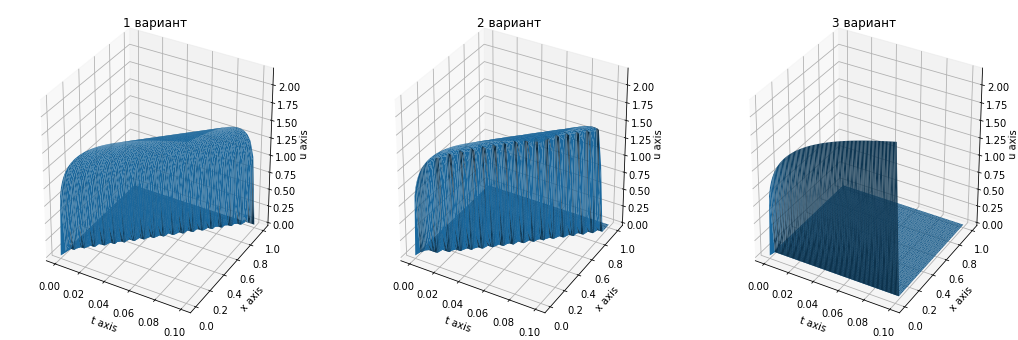

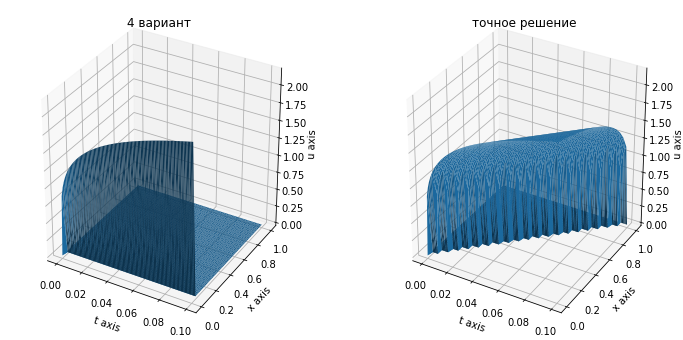

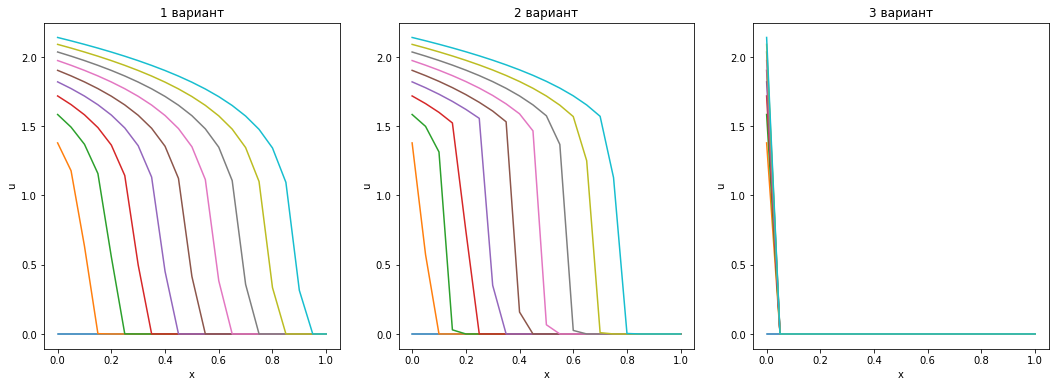

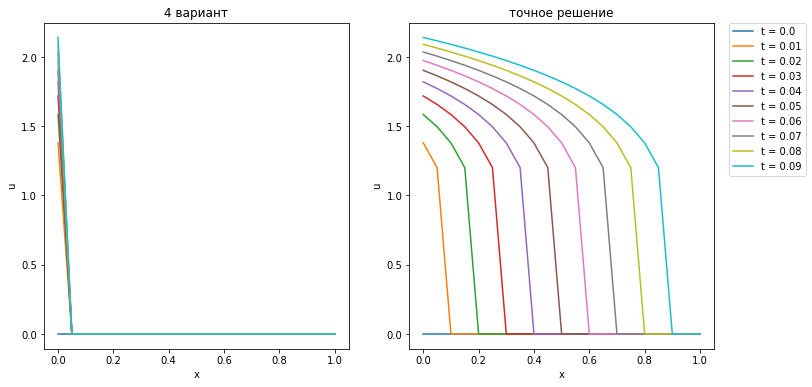

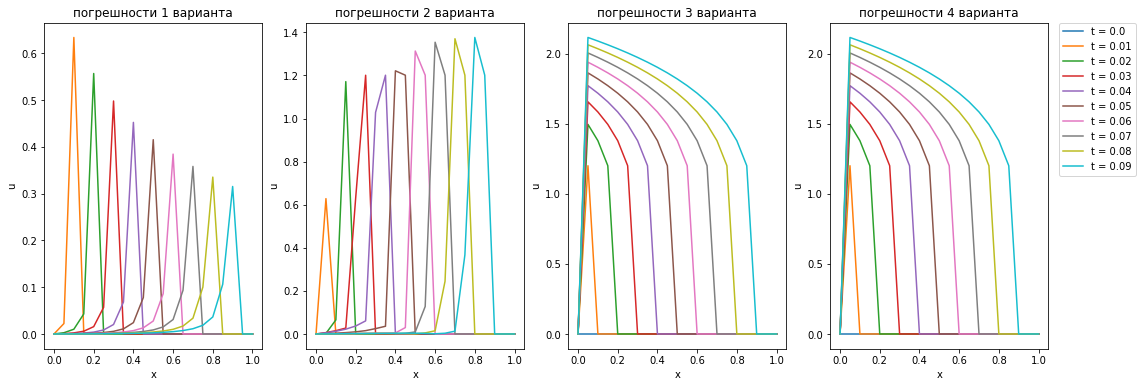

In [2]:
# Начальные и граничные условия
x_left = 0
x_right = 1
x_step = 0.05
x_n = int((x_right-x_left)/x_step)

t_left = 0
t_right = 0.1
t_step = 0.001
t_n = int((t_right-t_left)/t_step)

a = 1.0
alpha = 5.0
alpha1 = 0.0
alpha2 = 0.0
beta1 = 1.0
beta2 = 1.0
D = 10
front_frequency = 10
def f1(t):
    return (alpha*D**2*t)**(1/alpha)
def f2(t):
    if(x_right-D*t <= 0):
        return (alpha*D*(D*t-x_right))**(1/alpha)
    else:
        return 0    
def g(x):
    return 0
def q(t,x):
    return 0

def exact_solution(t, x):
    if(x-D*t <= 0):
        return (alpha*D*(D*t-x))**(1/alpha)
    else:
        return 0

fig1 = plt.figure(figsize=(18,6))
fig3 = plt.figure(figsize=(12,6))
fig2 = plt.figure(figsize=(18,6))
fig4 = plt.figure(figsize=(12,6))
fig5 = plt.figure(figsize=(18,6))

for i in np.arange(1,4):
    solution = solve_equation(t_n, x_n, t_step, x_step,i,0)
    ax1 = fig1.add_subplot(1, 3, i, projection='3d')
    ax2 = fig2.add_subplot(1, 3, i)
    ax = fig5.add_subplot(1, 4, i)
    plot_3d(ax1, ax2, solution, t_n, x_n, i, front_frequency)
    plot_error(ax, solution, t_n, x_n, i, t_step, x_step, front_frequency)
    
solution = solve_equation(t_n, x_n, t_step, x_step,4,0)
ax1 = fig3.add_subplot(1, 2, 1, projection='3d')
ax2 = fig4.add_subplot(1, 2, 1)
ax = fig5.add_subplot(1, 4, 4)
plot_3d(ax1, ax2, solution, t_n, x_n, 4, front_frequency)
plot_error(ax, solution, t_n, x_n, 4, t_step, x_step, front_frequency)

ax1 = fig3.add_subplot(1, 2, 2, projection='3d')
ax2 = fig4.add_subplot(1, 2, 2)
plot_3d_exact_solution(ax1, ax2, t_n, x_n, t_step, x_step, front_frequency)

ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

Видно, что 1 и 2 методы расчета подходят для решения этой задачи. Метод 1 значительно точнее 2. Средние гармонические 3 и 4 в знаменателе дают 0, из-за чего вид решения далек от точного. Однако, как мы увидим дальше, для некоторых задач они все же пригодны.

Теперь посмотрим на изменение погрешности на сгущающихся сетках на примере 1го метода.

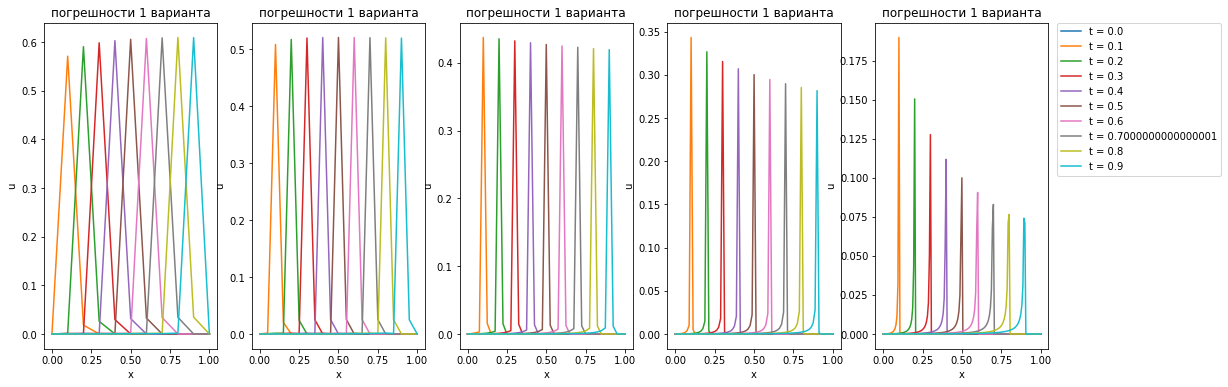

In [14]:
# Начальные и граничные условия
x_left = 0
x_right = 1
x_step = 0.1
x_n = int((x_right-x_left)/x_step)

t_left = 0
t_right = 1
t_step = 0.001
t_n = int((t_right-t_left)/t_step)

a = 1.0
alpha = 5.0
alpha1 = 0.0
alpha2 = 0.0
beta1 = 1.0
beta2 = 1.0
D = 1
front_frequency = 100
def f1(t):
    return (alpha*D**2*t)**(1/alpha)
def f2(t):
    if(x_right-D*t <= 0):
        return (alpha*D*(D*t-x_right))**(1/alpha)
    else:
        return 0    
def g(x):
    return 0
def q(t,x):
    return 0

def exact_solution(t, x):
    if(x-D*t <= 0):
        return (alpha*D*(D*t-x))**(1/alpha)
    else:
        return 0

fig1 = plt.figure(figsize=(18,6))

for i in np.arange(1,6):
    solution = solve_equation(t_n, x_n, t_step, x_step,1,0)
    ax = fig1.add_subplot(1, 5, i)
    plot_error(ax, solution, t_n, x_n, 1, t_step, x_step, front_frequency)
    x_step /= 2
    x_n = int((x_right-x_left)/x_step)

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

Все в порядке, погрешность уменьшается.

## 4. Исследование сходимости по сетке. Точность решений. Сравнение с аналитическим.
Убедившить, что методы 3 и 4 не самые лучшие, будем далее исследовать методы 1 и 2. Рассмотрим пару других задач, каждую решим 2мя методами, исследуем сходимость по сетке, сравним численные решения с аналитическими.

### Задача 2

$$ u_t=(2u u_x)_x+4(\cos x+t)\cos x$$ $$ u(0,t)=1+2t, \quad t\in(0,T)\\ u(X,t)=\cos X + 2t, \quad t\in(0,T)\\ u(x,0)=\cos x, \quad x\in(0,X), X < \frac{\pi}{2} $$
Решение: $\quad u(x,t)=\cos x + 2t$

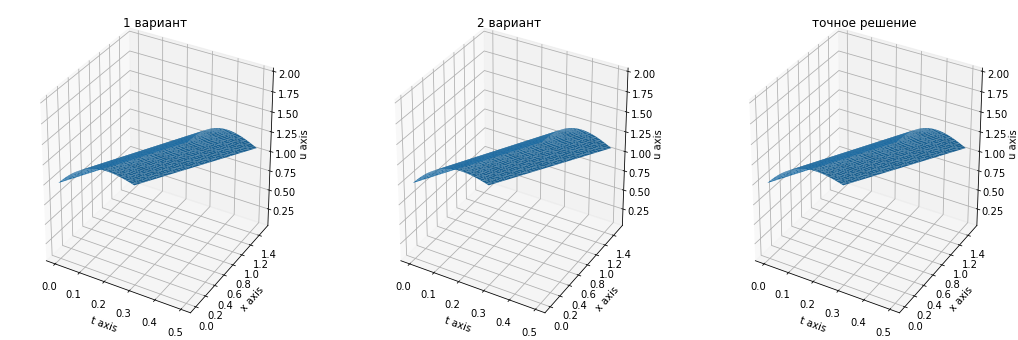

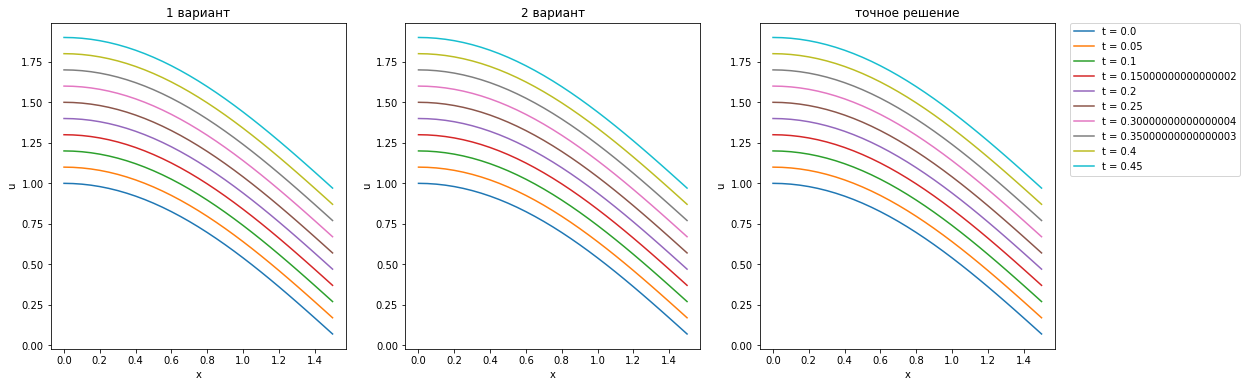

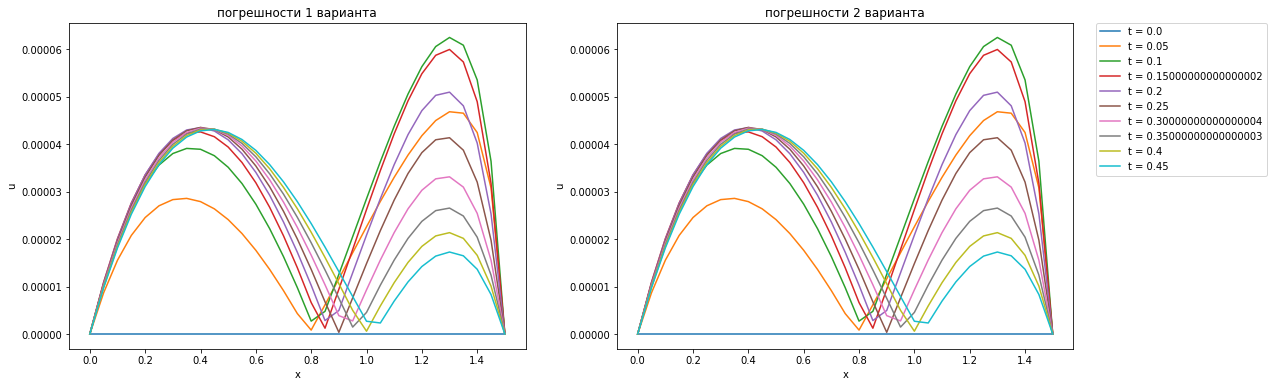

In [108]:
# Начальные и граничные условия
x_left = 0
x_right = 1.5
x_step = 0.05
x_n = int((x_right-x_left)/x_step)

t_left = 0
t_right = 0.5
t_step = 0.05
t_n = int((t_right-t_left)/t_step)

a = 2.0
alpha = 1.0
alpha1 = 0.0
alpha2 = 0.0
beta1 = 1.0
beta2 = 1.0

front_frequency = 1
def f1(t):
    return 1+2*t
def f2(t):
    return np.cos(x_right)+2*t
def g(x):
    return np.cos(x)
def q(t,x):
    return 4*np.cos(x)*(np.cos(x)+t)

def exact_solution(t, x):
    return np.cos(x)+2*t

#Расчет и графики
fig1 = plt.figure(figsize=(18,6))
fig2 = plt.figure(figsize=(18,6))
fig3 = plt.figure(figsize=(18,6))

for i in np.arange(1,3):
    solution = solve_equation(t_n, x_n, t_step, x_step,i,0)
    ax1 = fig1.add_subplot(1, 3, i, projection='3d')
    ax2 = fig2.add_subplot(1, 3, i)
    ax = fig3.add_subplot(1, 2, i)
    plot_3d(ax1, ax2, solution, t_n, x_n, i, front_frequency)
    plot_error(ax, solution, t_n, x_n, i, t_step, x_step, front_frequency)

ax1 = fig1.add_subplot(1, 3, 3, projection='3d')
ax2 = fig2.add_subplot(1, 3, 3)
plot_3d_exact_solution(ax1, ax2, t_n, x_n, t_step, x_step, front_frequency)

ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

### Сходимость по сетке

Сначала по правилу Рунге оценим порядок сходимости по каждой из переменных, а затем выберем оптимальное соотношение между шагами, обеспечивающее максимальный порядок сходимости. Кратко о правиле Рунге:
$$
A^* = A_h+\varepsilon_h+o(h^p)\\
A^* = A_{\frac{h}{2}}+\varepsilon_{\frac{h}{2}}+o(h^p)\\
\varepsilon_{\frac{h}{2}}=\frac{|A_h-A_{\frac{h}{2}}|}{2^p-1}\\
p=\log_2(\frac{|A_h-A_{\frac{h}{2}}|}{\varepsilon_{\frac{h}{2}}}+1)
$$

#### a) Сходимость по координате

In [93]:
# Начальные и граничные условия
x_left = 0
x_right = 1.5

t_left = 0
t_right = 0.5
t_step = 0.001
t_n = int((t_right-t_left)/t_step)

a = 2.0
alpha = 1.0
alpha1 = 0.0
alpha2 = 0.0
beta1 = 1.0
beta2 = 1.0

front_frequency = 1
def f1(t):
    return 1+2*t
def f2(t):
    return np.cos(x_right)+2*t
def g(x):
    return np.cos(x)
def q(t,x):
    return 4*np.cos(x)*(np.cos(x)+t)

def exact_solution(t, x):
    return np.cos(x)+2*t

steps = [0.1, 0.05, 0.025, 0.0125]

for step in steps:
    x_step = step
    x_n = int((x_right-x_left)/x_step)
    
    Z_exact_0 = []
    Z_exact_1 = []
    for j in np.arange(0,t_n+1):
        for i in np.arange(0,x_n+1):
            Z_exact_0.append(exact_solution(t_left+t_step*j, x_left+x_step*i))
            
    x_step = step/2.0
    x_n = int((x_right-x_left)/x_step)
    
    for j in np.arange(0,t_n+1):
        for i in np.arange(0,x_n+1):
            Z_exact_1.append(exact_solution(t_left+t_step*j, x_left+x_step*i))

    for k in np.arange(1,3):
        x_step = step
        x_n = int((x_right-x_left)/x_step)
        solution_0 = solve_equation(t_n, x_n, t_step, x_step,k,0)
        x_step = step/2
        x_n = int((x_right-x_left)/x_step)
        solution_1 = solve_equation(t_n, x_n, t_step, x_step,k,0)
        
        Z_0 = []
        Z_1 = []
        Z_0_tmp = []
        Z_1_tmp = []
        for i in solution_0:
            for j in i:
                Z_0.append(j.u)
        for i in solution_1:
            for j in i:
                Z_1.append(j.u)
        
        err_0 = 0
        err_1 = 0
        err = 0
        for i in range(0,len(Z_exact_0)):
            err_0 += np.abs(Z_exact_0[i]-Z_0[i])
        for i in range(0,len(Z_exact_1)):
            err_1 += np.abs(Z_exact_1[i]-Z_1[i])
        err_0 /= len(Z_exact_0)
        err_1 /= len(Z_exact_1)
        
        print('Отклонения '+str(k)+' метода от точного решения при шагах t=',t_step,' x=',step,' :\n', err_0)
        print('Отклонения '+str(k)+' метода от точного решения при шагах t=',t_step,' x=',step/2,' :\n', err_1)
        
        x_step = step
        x_n = int((x_right-x_left)/x_step)
        
        for i in np.arange(0,t_n):
            for j in np.arange(0,x_n):
                err += np.abs(solution_0[i][j].u-solution_1[i][j*2].u)
        err /= x_n*t_n
        p = np.log2(err/err_1+1)
        print('Порядок сходимости по Рунге p = ', p)
    print()
    


Отклонения 1 метода от точного решения при шагах t= 0.001  x= 0.1  :
 9.225614368345605e-05
Отклонения 1 метода от точного решения при шагах t= 0.001  x= 0.05  :
 2.4048360467704243e-05
Порядок сходимости по Рунге p =  2.0250899796065496
Отклонения 2 метода от точного решения при шагах t= 0.001  x= 0.1  :
 9.225614368345605e-05
Отклонения 2 метода от точного решения при шагах t= 0.001  x= 0.05  :
 2.4048360467704243e-05
Порядок сходимости по Рунге p =  2.0250899796065496

Отклонения 1 метода от точного решения при шагах t= 0.001  x= 0.05  :
 2.4048360467704243e-05
Отклонения 1 метода от точного решения при шагах t= 0.001  x= 0.025  :
 6.126957585426693e-06
Порядок сходимости по Рунге p =  2.0153293630434352
Отклонения 2 метода от точного решения при шагах t= 0.001  x= 0.05  :
 2.4048360467704243e-05
Отклонения 2 метода от точного решения при шагах t= 0.001  x= 0.025  :
 6.126957585426693e-06
Порядок сходимости по Рунге p =  2.0153293630434352

Отклонения 1 метода от точного решения при

#### б) Сходимость по времени

In [95]:
# Начальные и граничные условия
x_left = 0
x_right = 0.5
x_step = 0.1
x_n = int((x_right-x_left)/x_step)

t_left = 0
t_right = 1.0

a = 2.0
alpha = 1.0
alpha1 = 0.0
alpha2 = 0.0
beta1 = 1.0
beta2 = 1.0

front_frequency = 1
def f1(t):
    return 1+2*t
def f2(t):
    return np.cos(x_right)+2*t
def g(x):
    return np.cos(x)
def q(t,x):
    return 4*np.cos(x)*(np.cos(x)+t)

def exact_solution(t, x):
    return np.cos(x)+2*t

steps = [0.1, 0.05, 0.025, 0.0125]

for step in steps:
    t_step = step
    t_n = int((t_right-t_left)/t_step)
    
    Z_exact_0 = []
    Z_exact_1 = []
    for j in np.arange(0,t_n+1):
        for i in np.arange(0,x_n+1):
            Z_exact_0.append(exact_solution(t_left+t_step*j, x_left+x_step*i))
            
    t_step = step/2
    t_n = int((t_right-t_left)/t_step)
    
    for j in np.arange(0,t_n+1):
        for i in np.arange(0,x_n+1):
            Z_exact_1.append(exact_solution(t_left+t_step*j, x_left+x_step*i))

    for k in np.arange(1,3):
        t_step = step
        t_n = int((t_right-t_left)/t_step)
        solution_0 = solve_equation(t_n, x_n, t_step, x_step,k,0)
        t_step = step/2
        t_n = int((t_right-t_left)/t_step)
        solution_1 = solve_equation(t_n, x_n, t_step, x_step,k,0)
        
        Z_0 = []
        Z_1 = []
        Z_0_tmp = []
        Z_1_tmp = []
        for i in solution_0:
            for j in i:
                Z_0.append(j.u)
        for i in solution_1:
            for j in i:
                Z_1.append(j.u)
        
        err_0 = 0
        err_1 = 0
        err = 0
        for i in range(0,len(Z_exact_0)):
            err_0 += np.abs(Z_exact_0[i]-Z_0[i])
        for i in range(0,len(Z_exact_1)):
            err_1 += np.abs(Z_exact_1[i]-Z_1[i])
        err_0 /= len(Z_exact_0)
        err_1 /= len(Z_exact_1)
        
        print('Отклонения '+str(k)+' метода от точного решения при шагах t=',step,' x=',x_step,' :\n', err_0)
        print('Отклонения '+str(k)+' метода от точного решения при шагах t=',step/2,' x=',x_step,' :\n', err_1)
        
        t_step = step
        t_n = int((t_right-t_left)/t_step)
        
        for i in np.arange(0,t_n):
            for j in np.arange(0,x_n):
                err += np.abs(solution_0[i][j].u-solution_1[i*2][j].u)
        err /= x_n*t_n
        p = np.log2(err/err_1+1)
        print('Порядок сходимости по Рунге p = ', p)
    print()
    

Отклонения 1 метода от точного решения при шагах t= 0.1  x= 0.1  :
 3.069204760991652e-05
Отклонения 1 метода от точного решения при шагах t= 0.05  x= 0.1  :
 3.152490875026434e-05
Порядок сходимости по Рунге p =  0.05244282927005172
Отклонения 2 метода от точного решения при шагах t= 0.1  x= 0.1  :
 3.069204760991652e-05
Отклонения 2 метода от точного решения при шагах t= 0.05  x= 0.1  :
 3.152490875026434e-05
Порядок сходимости по Рунге p =  0.05244282927005172

Отклонения 1 метода от точного решения при шагах t= 0.05  x= 0.1  :
 3.152490875026434e-05
Отклонения 1 метода от точного решения при шагах t= 0.025  x= 0.1  :
 3.1982316240980966e-05
Порядок сходимости по Рунге p =  0.033260338715860406
Отклонения 2 метода от точного решения при шагах t= 0.05  x= 0.1  :
 3.152490875026434e-05
Отклонения 2 метода от точного решения при шагах t= 0.025  x= 0.1  :
 3.1982316240980966e-05
Порядок сходимости по Рунге p =  0.033260338715860406

Отклонения 1 метода от точного решения при шагах t= 0.

### Задача 3

$$ u_t=(u u_x)_x + x^2-6x^2(t+2)^2$$ $$ u(0,t)=0, \quad t\in(0,T)\\ u(X,t)=(t+2)X^2, \quad t\in(0,T)\\ u(x,0)=2 x^2, \quad x\in(0,X) $$
Решение: $\quad u(x,t)=(t+2)x^2$

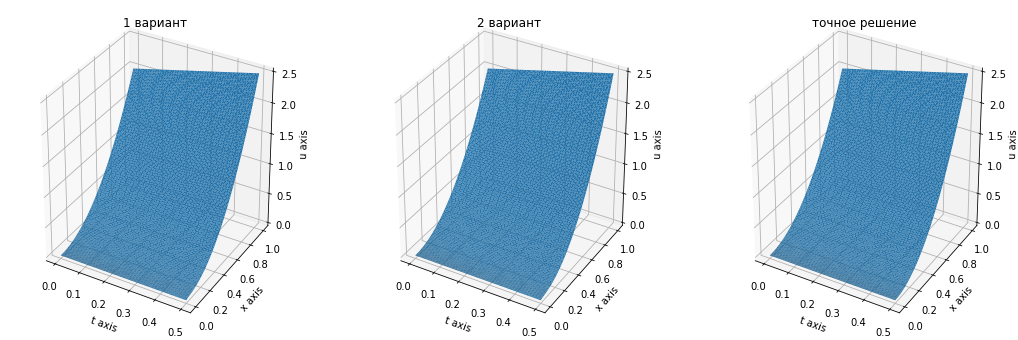

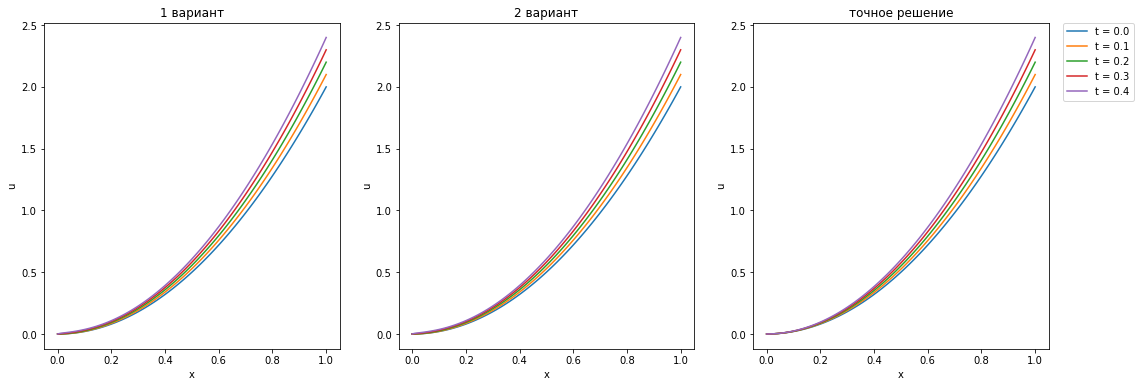

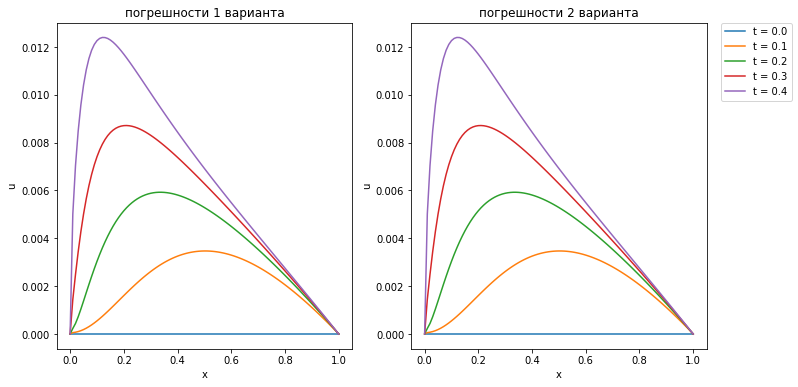

In [113]:
# Начальные и граничные условия
x_left = 0
x_right = 1
x_step = 0.01
x_n = int((x_right-x_left)/x_step)

t_left = 0
t_right = 0.5
t_step = 0.01
t_n = int((t_right-t_left)/t_step)

a = 1.0
alpha = 1.0
alpha1 = 0.0
alpha2 = 0.0
beta1 = 1.0
beta2 = 1.0

front_frequency = 10
def f1(t):
    return 0
def f2(t):
    return (t+2)*(x_right)**2
def g(x):
    return 2*x**2
def q(t,x):
    return x**2-6*x**2*(t+2)**2

def exact_solution(t, x):
    return (t+2)*x**2

#Расчет и графики
fig1 = plt.figure(figsize=(18,6))
fig2 = plt.figure(figsize=(18,6))
fig3 = plt.figure(figsize=(18,6))

for i in np.arange(1,3):
    solution = solve_equation(t_n, x_n, t_step, x_step,i,0)
    ax1 = fig1.add_subplot(1, 3, i, projection='3d')
    ax2 = fig2.add_subplot(1, 3, i)
    ax = fig3.add_subplot(1, 3, i)
    plot_3d(ax1, ax2, solution, t_n, x_n, i, front_frequency)
    plot_error(ax, solution, t_n, x_n, i, t_step, x_step, front_frequency)

ax1 = fig1.add_subplot(1, 3, 3, projection='3d')
ax2 = fig2.add_subplot(1, 3, 3)
plot_3d_exact_solution(ax1, ax2, t_n, x_n, t_step, x_step, front_frequency)

ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

### Сходимость по сетке

#### а) Сходимость по координате

In [97]:
# Начальные и граничные условия
x_left = 0
x_right = 1

t_left = 0
t_right = 0.5
t_step = 0.0001
t_n = int((t_right-t_left)/t_step)

a = 1.0
alpha = 1.0
alpha1 = 0.0
alpha2 = 0.0
beta1 = 1.0
beta2 = 1.0

front_frequency = 10
def f1(t):
    return 0
def f2(t):
    return (t+2)*(x_right)**2
def g(x):
    return 2*x**2
def q(t,x):
    return x**2-6*x**2*(t+2)**2

def exact_solution(t, x):
    return (t+2)*x**2

steps = [0.2, 0.1, 0.05, 0.025]

for step in steps:
    x_step = step
    x_n = int((x_right-x_left)/x_step)
    
    Z_exact_0 = []
    Z_exact_1 = []
    for j in np.arange(0,t_n+1):
        for i in np.arange(0,x_n+1):
            Z_exact_0.append(exact_solution(t_left+t_step*j, x_left+x_step*i))
            
    x_step = step/2.0
    x_n = int((x_right-x_left)/x_step)
    
    for j in np.arange(0,t_n+1):
        for i in np.arange(0,x_n+1):
            Z_exact_1.append(exact_solution(t_left+t_step*j, x_left+x_step*i))

    for k in np.arange(1,3):
        x_step = step
        x_n = int((x_right-x_left)/x_step)
        solution_0 = solve_equation(t_n, x_n, t_step, x_step,k,0)
        x_step = step/2
        x_n = int((x_right-x_left)/x_step)
        solution_1 = solve_equation(t_n, x_n, t_step, x_step,k,0)
        
        Z_0 = []
        Z_1 = []
        Z_0_tmp = []
        Z_1_tmp = []
        for i in solution_0:
            for j in i:
                Z_0.append(j.u)
        for i in solution_1:
            for j in i:
                Z_1.append(j.u)
        
        err_0 = 0
        err_1 = 0
        err = 0
        for i in range(0,len(Z_exact_0)):
            err_0 += np.abs(Z_exact_0[i]-Z_0[i])
        for i in range(0,len(Z_exact_1)):
            err_1 += np.abs(Z_exact_1[i]-Z_1[i])
        err_0 /= len(Z_exact_0)
        err_1 /= len(Z_exact_1)
        
        print('Отклонения '+str(k)+' метода от точного решения при шагах t=',t_step,' x=',step,' :\n', err_0)
        print('Отклонения '+str(k)+' метода от точного решения при шагах t=',t_step,' x=',step/2,' :\n', err_1)
        
        x_step = step
        x_n = int((x_right-x_left)/x_step)
        
        for i in np.arange(0,t_n):
            for j in np.arange(0,x_n):
                err += np.abs(solution_0[i][j].u-solution_1[i][j*2].u)
        err /= x_n*t_n
        p = np.log2(err/err_1+1)
        print('Порядок сходимости по Рунге p = ', p)
    print()
    


Отклонения 1 метода от точного решения при шагах t= 0.0001  x= 0.2  :
 0.018133127516697465
Отклонения 1 метода от точного решения при шагах t= 0.0001  x= 0.1  :
 0.005960641516134098
Порядок сходимости по Рунге p =  1.8907650457142806
Отклонения 2 метода от точного решения при шагах t= 0.0001  x= 0.2  :
 0.018133127516697465
Отклонения 2 метода от точного решения при шагах t= 0.0001  x= 0.1  :
 0.005960641516134098
Порядок сходимости по Рунге p =  1.8907650457142806

Отклонения 1 метода от точного решения при шагах t= 0.0001  x= 0.1  :
 0.005960641516134098
Отклонения 1 метода от точного решения при шагах t= 0.0001  x= 0.05  :
 0.0017487442832226007
Порядок сходимости по Рунге p =  1.9158012719396733
Отклонения 2 метода от точного решения при шагах t= 0.0001  x= 0.1  :
 0.005960641516134098
Отклонения 2 метода от точного решения при шагах t= 0.0001  x= 0.05  :
 0.0017487442832226007
Порядок сходимости по Рунге p =  1.9158012719396733

Отклонения 1 метода от точного решения при шагах t

### б)Сходимость по времени

In [98]:
# Начальные и граничные условия
x_left = 0
x_right = 1
x_step = 0.1
x_n = int((x_right-x_left)/x_step)

t_left = 0
t_right = 0.5
t_step = 0.01
t_n = int((t_right-t_left)/t_step)

a = 1.0
alpha = 1.0
alpha1 = 0.0
alpha2 = 0.0
beta1 = 1.0
beta2 = 1.0

front_frequency = 10
def f1(t):
    return 0
def f2(t):
    return (t+2)*(x_right)**2
def g(x):
    return 2*x**2
def q(t,x):
    return x**2-6*x**2*(t+2)**2

def exact_solution(t, x):
    return (t+2)*x**2

steps = [0.1, 0.05, 0.025, 0.0125]

for step in steps:
    t_step = step
    t_n = int((t_right-t_left)/t_step)
    
    Z_exact_0 = []
    Z_exact_1 = []
    for j in np.arange(0,t_n+1):
        for i in np.arange(0,x_n+1):
            Z_exact_0.append(exact_solution(t_left+t_step*j, x_left+x_step*i))
            
    t_step = step/2
    t_n = int((t_right-t_left)/t_step)
    
    for j in np.arange(0,t_n+1):
        for i in np.arange(0,x_n+1):
            Z_exact_1.append(exact_solution(t_left+t_step*j, x_left+x_step*i))

    for k in np.arange(1,3):
        t_step = step
        t_n = int((t_right-t_left)/t_step)
        solution_0 = solve_equation(t_n, x_n, t_step, x_step,k,0)
        t_step = step/2
        t_n = int((t_right-t_left)/t_step)
        solution_1 = solve_equation(t_n, x_n, t_step, x_step,k,0)
        
        Z_0 = []
        Z_1 = []
        Z_0_tmp = []
        Z_1_tmp = []
        for i in solution_0:
            for j in i:
                Z_0.append(j.u)
        for i in solution_1:
            for j in i:
                Z_1.append(j.u)
        
        err_0 = 0
        err_1 = 0
        err = 0
        for i in range(0,len(Z_exact_0)):
            err_0 += np.abs(Z_exact_0[i]-Z_0[i])
        for i in range(0,len(Z_exact_1)):
            err_1 += np.abs(Z_exact_1[i]-Z_1[i])
        err_0 /= len(Z_exact_0)
        err_1 /= len(Z_exact_1)
        
        print('Отклонения '+str(k)+' метода от точного решения при шагах t=',step,' x=',x_step,' :\n', err_0)
        print('Отклонения '+str(k)+' метода от точного решения при шагах t=',step/2,' x=',x_step,' :\n', err_1)
        
        t_step = step
        t_n = int((t_right-t_left)/t_step)
        
        for i in np.arange(0,t_n):
            for j in np.arange(0,x_n):
                err += np.abs(solution_0[i][j].u-solution_1[i*2][j].u)
        err /= x_n*t_n
        p = np.log2(err/err_1+1)
        print('Порядок сходимости по Рунге p = ', p)
    print()
    

Отклонения 1 метода от точного решения при шагах t= 0.1  x= 0.1  :
 0.03431225623910088
Отклонения 1 метода от точного решения при шагах t= 0.05  x= 0.1  :
 0.021834756337792957
Порядок сходимости по Рунге p =  0.6131830035903924
Отклонения 2 метода от точного решения при шагах t= 0.1  x= 0.1  :
 0.03431225623910088
Отклонения 2 метода от точного решения при шагах t= 0.05  x= 0.1  :
 0.021834756337792957
Порядок сходимости по Рунге p =  0.6131830035903924

Отклонения 1 метода от точного решения при шагах t= 0.05  x= 0.1  :
 0.021834756337792957
Отклонения 1 метода от точного решения при шагах t= 0.025  x= 0.1  :
 0.014383496931058152
Порядок сходимости по Рунге p =  0.616128035736821
Отклонения 2 метода от точного решения при шагах t= 0.05  x= 0.1  :
 0.021834756337792957
Отклонения 2 метода от точного решения при шагах t= 0.025  x= 0.1  :
 0.014383496931058152
Порядок сходимости по Рунге p =  0.616128035736821

Отклонения 1 метода от точного решения при шагах t= 0.025  x= 0.1  :
 0.01

Порядок сходимости по координате равен 2, по времени 1. Теперь, когда мы знаем скорость сходимости по времени и координате,  мы можем выбрать совместно шаг сетки($\tau \approx h^2$) и оценить порядок сходимости по Рунге. Оценим порядок для задачи 2.

In [100]:
x_left = 0
x_right = 0.5

t_left = 0
t_right = 1.0

a = 2.0
alpha = 1.0
alpha1 = 0.0
alpha2 = 0.0
beta1 = 1.0
beta2 = 1.0

front_frequency = 1
def f1(t):
    return 1+2*t
def f2(t):
    return np.cos(x_right)+2*t
def g(x):
    return np.cos(x)
def q(t,x):
    return 4*np.cos(x)*(np.cos(x)+t)

def exact_solution(t, x):
    return np.cos(x)+2*t

steps = [0.1, 0.05, 0.025]

for step in steps:
    x_step = step
    x_n = int((x_right-x_left)/x_step)
    t_step = x_step**2
    t_n = int((t_right-t_left)/t_step)
    
    Z_exact_0 = []
    Z_exact_1 = []
    for j in np.arange(0,t_n+1):
        for i in np.arange(0,x_n+1):
            Z_exact_0.append(exact_solution(t_left+t_step*j, x_left+x_step*i))
            
    x_step = step/2
    x_n = int((x_right-x_left)/x_step)
    t_step = x_step**2
    t_n = int((t_right-t_left)/t_step)
    
    for j in np.arange(0,t_n+1):
        for i in np.arange(0,x_n+1):
            Z_exact_1.append(exact_solution(t_left+t_step*j, x_left+x_step*i))

    for k in np.arange(1,3):
        x_step = step
        x_n = int((x_right-x_left)/x_step)
        t_step = x_step**2
        t_n = int((t_right-t_left)/t_step)
        solution_0 = solve_equation(t_n, x_n, t_step, x_step,k,0)
        
        x_step = step/2
        x_n = int((x_right-x_left)/x_step)
        t_step = x_step**2
        t_n = int((t_right-t_left)/t_step)
        solution_1 = solve_equation(t_n, x_n, t_step, x_step,k,0)
        
        Z_0 = []
        Z_1 = []
        for i in solution_0:
            for j in i:
                Z_0.append(j.u)
        for i in solution_1:
            for j in i:
                Z_1.append(j.u)
        
        err_0 = 0
        err_1 = 0
        err = 0
        for i in range(0,len(Z_exact_0)):
            err_0 += np.abs(Z_exact_0[i]-Z_0[i])
        for i in range(0,len(Z_exact_1)):
            err_1 += np.abs(Z_exact_1[i]-Z_1[i])
        err_0 /= len(Z_exact_0)
        err_1 /= len(Z_exact_1)
        
        print('Отклонения '+str(k)+' метода от точного решения при шагах t=',step**2,' x=',step,' :\n', err_0)
        print('Отклонения '+str(k)+' метода от точного решения при шагах t=',(step/2)**2,' x=',step/2,' :\n', err_1)
        
        p = np.log2((err_0-err_1)/err_1+1)
        print('Порядок сходимости по Рунге p = ', p)
    print()
    

Отклонения 1 метода от точного решения при шагах t= 0.010000000000000002  x= 0.1  :
 3.2341508290879744e-05
Отклонения 1 метода от точного решения при шагах t= 0.0025000000000000005  x= 0.05  :
 9.114470409572523e-06
Порядок сходимости по Рунге p =  1.8271562255080935
Отклонения 2 метода от точного решения при шагах t= 0.010000000000000002  x= 0.1  :
 3.2341508290879744e-05
Отклонения 2 метода от точного решения при шагах t= 0.0025000000000000005  x= 0.05  :
 9.114470409572523e-06
Порядок сходимости по Рунге p =  1.8271562255080935

Отклонения 1 метода от точного решения при шагах t= 0.0025000000000000005  x= 0.05  :
 9.114470409572523e-06
Отклонения 1 метода от точного решения при шагах t= 0.0006250000000000001  x= 0.025  :
 2.406419781906767e-06
Порядок сходимости по Рунге p =  1.921270500023035
Отклонения 2 метода от точного решения при шагах t= 0.0025000000000000005  x= 0.05  :
 9.114470409572523e-06
Отклонения 2 метода от точного решения при шагах t= 0.0006250000000000001  x= 0.02

## 4. Расчет коэффициентов теплопроводности с верхнего слоя
Теперь, когда уже все посчитано для исходной задачи, давайте рассмотрим вопрос о влиянии на точность численного решения расчета коэффициента теплопроводности. Теперь на каждом слое можно применить схему для уточнения решения. Прогонка при уточнении будет выглядеть следующим образом:
$$
y_0^n(\beta_1-\frac{\alpha_1}{h})+y_1^n\frac{\alpha_1}{h}=f_1(t_n)\\
y_{m-1}^{n+1}\frac{k_{m-\frac{1}{2}}^{n+1}}{h^2}-y_m^{n+1}(\frac{k_{m+\frac{1}{2}}^{n+1}+k_{m-\frac{1}{2}}^{n+1}}{h^2}+\frac{1}{\tau})+y_{m+1}^{n+1}\frac{k_{m+\frac{1}{2}}^{n+1}}{h^2}=-\frac{y_m^n}{\tau}-q(x_m,t_{n+1})\\
y_{M-1}^n(-\frac{\alpha_2}{h})+y_M^n(\frac{\alpha_2}{h}+\beta_2)=f_2(t_n)\\
$$

Так как в исследуемых ниже задачах граничные условия заданы через значение решения на границе без производной, то повышать их порядок не требуется. В более общем случае желательно сначала аппроксимировать граничные условия с порядком по t большем 1, а уже после этого применять прогонку для уточнения. В противном же случае уточнение может не повысить порядок аппроксимации. В задачах ниже применяется метод 1 для расчета коэффициента теплопроводности. Для 2го делается аналогично.

### Задача 1

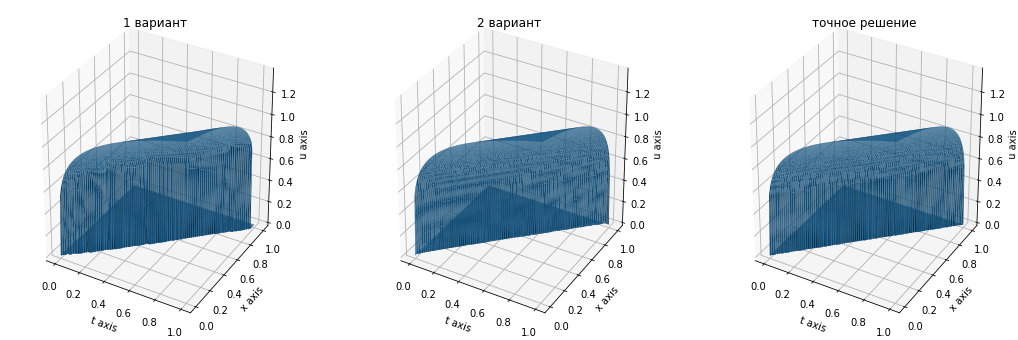

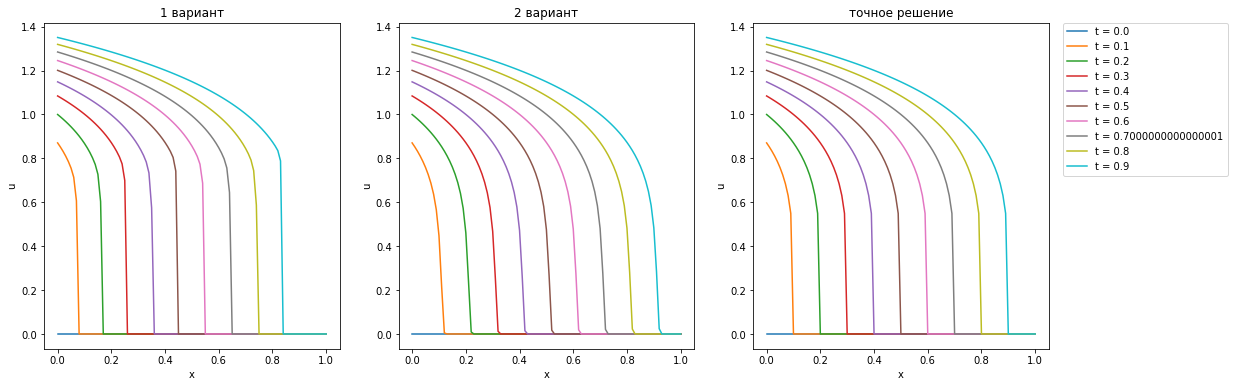

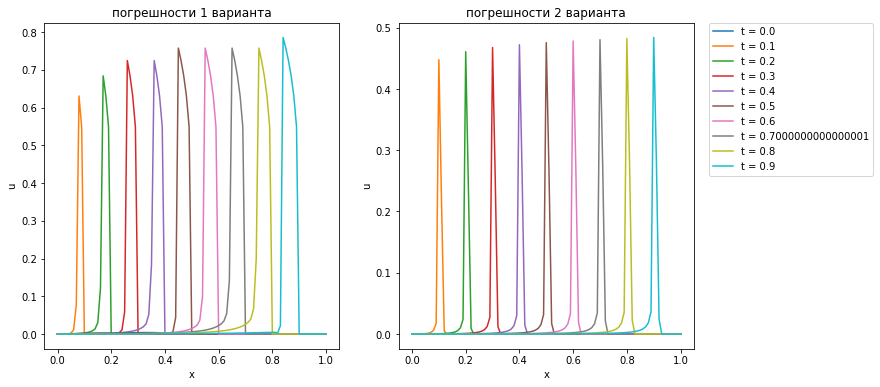

In [21]:
# Начальные и граничные условия
x_left = 0
x_right = 1
x_step = 0.01
x_n = int((x_right-x_left)/x_step)

t_left = 0
t_right = 1
t_step = 0.01
t_n = int((t_right-t_left)/t_step)

a = 1.0
alpha = 5.0
alpha1 = 0.0
alpha2 = 0.0
beta1 = 1.0
beta2 = 1.0
D = 1
front_frequency = 10
def f1(t):
    return (alpha*D**2*t)**(1/alpha)
def f2(t):
    if(x_right-D*t <= 0):
        return (alpha*D*(D*t-x_right))**(1/alpha)
    else:
        return 0    
def g(x):
    return 0
def q(t,x):
    return 0

def exact_solution(t, x):
    if(x-D*t <= 0):
        return (alpha*D*(D*t-x))**(1/alpha)
    else:
        return 0

#Расчет и графики
fig1 = plt.figure(figsize=(18,6))
fig2 = plt.figure(figsize=(18,6))
fig3 = plt.figure(figsize=(18,6))

solution1 = solve_equation(t_n, x_n, t_step, x_step,1,0)
solution2 = solve_equation(t_n, x_n, t_step, x_step,1,1000)

ax1 = fig1.add_subplot(1, 3, 1, projection='3d')
ax2 = fig2.add_subplot(1, 3, 1)
ax = fig3.add_subplot(1, 3, 1)
plot_3d(ax1, ax2, solution1, t_n, x_n, 1, front_frequency)
plot_error(ax, solution1, t_n, x_n, 1, t_step, x_step, front_frequency)

ax1 = fig1.add_subplot(1, 3, 2, projection='3d')
ax2 = fig2.add_subplot(1, 3, 2)
ax = fig3.add_subplot(1, 3, 2)
plot_3d(ax1, ax2, solution2, t_n, x_n, 2, front_frequency)
plot_error(ax, solution2, t_n, x_n, 2, t_step, x_step, front_frequency)

ax1 = fig1.add_subplot(1, 3, 3, projection='3d')
ax2 = fig2.add_subplot(1, 3, 3)
plot_3d_exact_solution(ax1, ax2, t_n, x_n, t_step, x_step, front_frequency)

ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

### Задача 3

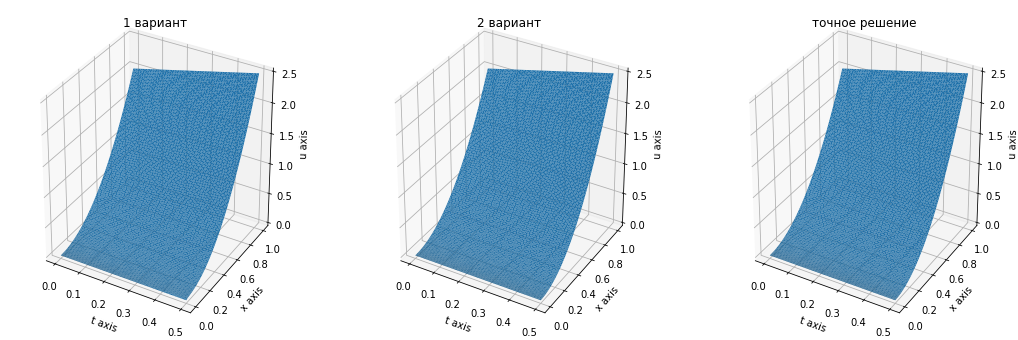

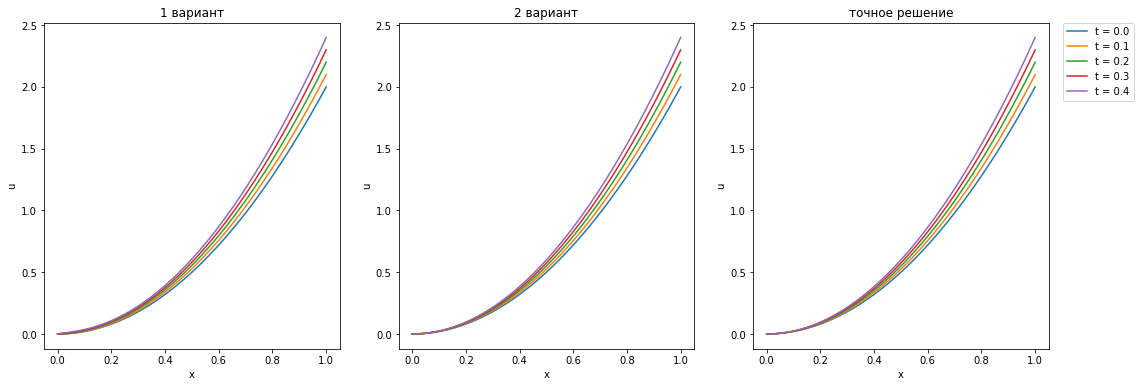

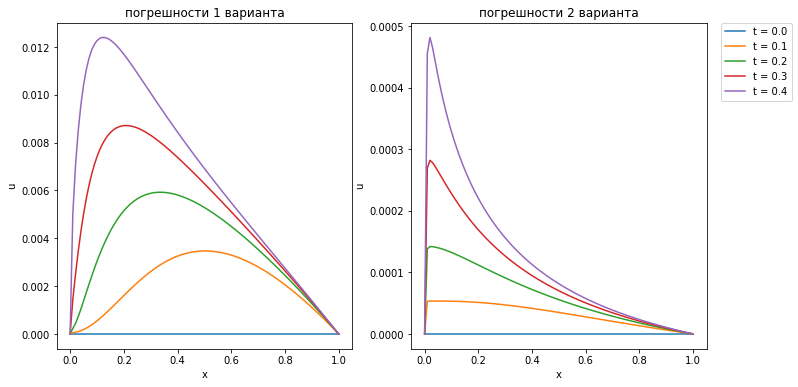

In [16]:
# Начальные и граничные условия
x_left = 0
x_right = 1
x_step = 0.01
x_n = int((x_right-x_left)/x_step)

t_left = 0
t_right = 0.5
t_step = 0.01
t_n = int((t_right-t_left)/t_step)

a = 1.0
alpha = 1.0
alpha1 = 0.0
alpha2 = 0.0
beta1 = 1.0
beta2 = 1.0

front_frequency = 10
def f1(t):
    return 0
def f2(t):
    return (t+2)*(x_right)**2
def g(x):
    return 2*x**2
def q(t,x):
    return x**2-6*x**2*(t+2)**2

def exact_solution(t, x):
    return (t+2)*x**2

#Расчет и графики
fig1 = plt.figure(figsize=(18,6))
fig2 = plt.figure(figsize=(18,6))
fig3 = plt.figure(figsize=(18,6))

solution1 = solve_equation(t_n, x_n, t_step, x_step,1,0)
solution2 = solve_equation(t_n, x_n, t_step, x_step,1,1000)

ax1 = fig1.add_subplot(1, 3, 1, projection='3d')
ax2 = fig2.add_subplot(1, 3, 1)
ax = fig3.add_subplot(1, 3, 1)
plot_3d(ax1, ax2, solution1, t_n, x_n, 1, front_frequency)
plot_error(ax, solution1, t_n, x_n, 1, t_step, x_step, front_frequency)

ax1 = fig1.add_subplot(1, 3, 2, projection='3d')
ax2 = fig2.add_subplot(1, 3, 2)
ax = fig3.add_subplot(1, 3, 2)
plot_3d(ax1, ax2, solution2, t_n, x_n, 2, front_frequency)
plot_error(ax, solution2, t_n, x_n, 2, t_step, x_step, front_frequency)

ax1 = fig1.add_subplot(1, 3, 3, projection='3d')
ax2 = fig2.add_subplot(1, 3, 3)
plot_3d_exact_solution(ax1, ax2, t_n, x_n, t_step, x_step, front_frequency)

ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

Нетрудно заметить, что уточняющая прогонка дала хорошие результаты. Погрешности уменьшились.

In [18]:
# Начальные и граничные условия
x_left = 0
x_right = 0.5

t_left = 0
t_right = 0.5
t_step = 0.01
t_n = int((t_right-t_left)/t_step)

a = 1.0
alpha = 1.0
alpha1 = 0.0
alpha2 = 0.0
beta1 = 1.0
beta2 = 1.0

front_frequency = 10
def f1(t):
    return 0
def f2(t):
    return (t+2)*(x_right)**2
def g(x):
    return 2*x**2
def q(t,x):
    return x**2-6*x**2*(t+2)**2

def exact_solution(t, x):
    return (t+2)*x**2

steps = [0.1, 0.05, 0.025]

for step in steps:
    x_step = step
    x_n = int((x_right-x_left)/x_step)
    
    Z_exact_0 = []
    Z_exact_1 = []
    for j in np.arange(0,t_n+1):
        for i in np.arange(0,x_n+1):
            Z_exact_0.append(exact_solution(t_left+t_step*j, x_left+x_step*i))
            
    x_step = step/2.0
    x_n = int((x_right-x_left)/x_step)
    
    for j in np.arange(0,t_n+1):
        for i in np.arange(0,x_n+1):
            Z_exact_1.append(exact_solution(t_left+t_step*j, x_left+x_step*i))

    for k in np.arange(1,3):
        x_step = step
        x_n = int((x_right-x_left)/x_step)
        solution_0 = solve_equation(t_n, x_n, t_step, x_step,1,(k-1)*1000)
        x_step = step/2
        x_n = int((x_right-x_left)/x_step)
        solution_1 = solve_equation(t_n, x_n, t_step, x_step,1,(k-1)*1000)
        
        Z_0 = []
        Z_1 = []
        Z_0_tmp = []
        Z_1_tmp = []
        for i in solution_0:
            for j in i:
                Z_0.append(j.u)
        for i in solution_1:
            for j in i:
                Z_1.append(j.u)
        
        err_0 = 0
        err_1 = 0
        err = 0
        for i in range(0,len(Z_exact_0)):
            err_0 += np.abs(Z_exact_0[i]-Z_0[i])
        for i in range(0,len(Z_exact_1)):
            err_1 += np.abs(Z_exact_1[i]-Z_1[i])
        err_0 /= len(Z_exact_0)
        err_1 /= len(Z_exact_1)
        
        print('Отклонения '+str(k)+' метода от точного решения при шагах t=',t_step,' x=',step,' :\n', err_0)
        print('Отклонения '+str(k)+' метода от точного решения при шагах t=',t_step,' x=',step/2,' :\n', err_1)
        
        x_step = step
        x_n = int((x_right-x_left)/x_step)
        
        for i in np.arange(0,t_n):
            for j in np.arange(0,x_n):
                err += np.abs(solution_0[i][j].u-solution_1[i][j*2].u)
        err /= x_n*t_n
        p = np.log2(err/err_1+1)
        print('Порядок сходимости по Рунге p = ', p)
    print()
    


Отклонения 1 метода от точного решения при шагах t= 0.01  x= 0.1  :
 0.005184082668035912
Отклонения 1 метода от точного решения при шагах t= 0.01  x= 0.05  :
 0.002360265681529171
Порядок сходимости по Рунге p =  1.3959242838832548
Отклонения 2 метода от точного решения при шагах t= 0.01  x= 0.1  :
 0.0044911058087089215
Отклонения 2 метода от точного решения при шагах t= 0.01  x= 0.05  :
 0.0014735293058313747
Порядок сходимости по Рунге p =  1.8793332598183334

Отклонения 1 метода от точного решения при шагах t= 0.01  x= 0.05  :
 0.002360265681529171
Отклонения 1 метода от точного решения при шагах t= 0.01  x= 0.025  :
 0.0014113333907905903
Порядок сходимости по Рунге p =  0.858097654195801
Отклонения 2 метода от точного решения при шагах t= 0.01  x= 0.05  :
 0.0014735293058313747
Отклонения 2 метода от точного решения при шагах t= 0.01  x= 0.025  :
 0.00042585679037915504
Порядок сходимости по Рунге p =  1.9210827985740837

Отклонения 1 метода от точного решения при шагах t= 0.01 

Видно, что метод с уточнением дает больший порядок сходимости даже в самых плохих случаях для прежнего метода.

## 5. Улучшение аппроксимации.

Теперь для достижения 2го порядка аппроксимации по времени применим параметрическую двухслойную шеститочечную разностную схему (схема Кранка-Никольсон реализуема при параметре 0,5), но стоит понимать, что хоть она и обладает хорошей аппроксимацией, но может давать осцилляции разностного происхождения на решениях с большим градиентом.

### Задача 3

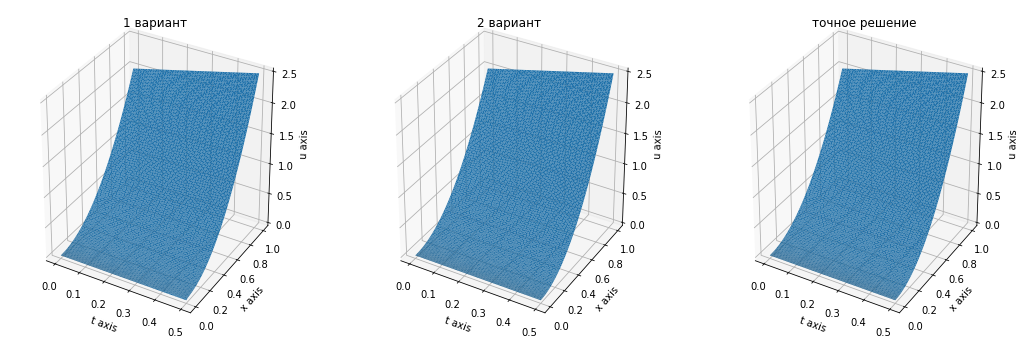

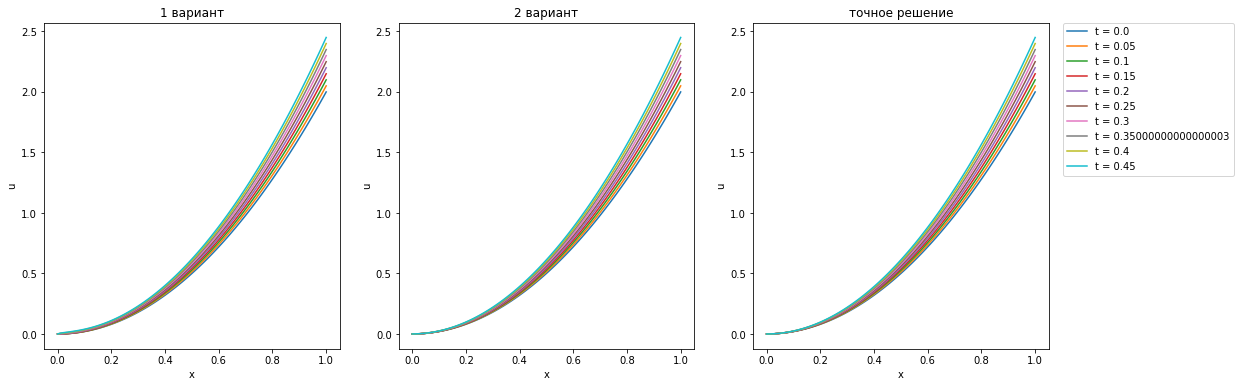

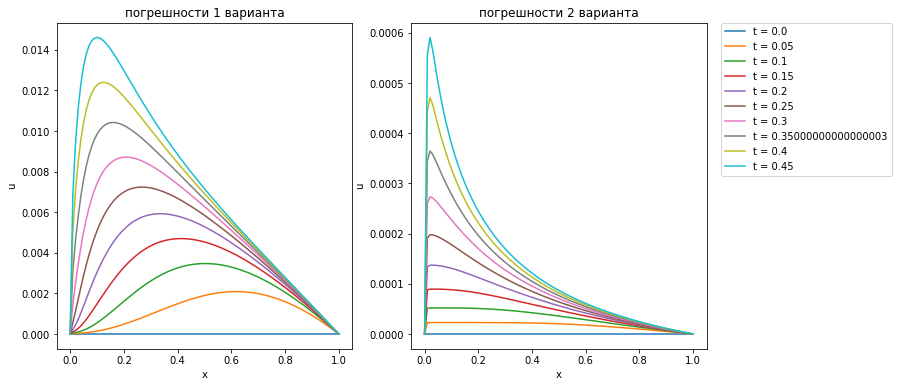

In [89]:
# Начальные и граничные условия
x_left = 0
x_right = 1
x_step = 0.01
x_n = int((x_right-x_left)/x_step)

t_left = 0
t_right = 0.5
t_step = 0.01
t_n = int((t_right-t_left)/t_step)

a = 1.0
alpha = 1.0
alpha1 = 0.0
alpha2 = 0.0
beta1 = 1.0
beta2 = 1.0

front_frequency = 5
def f1(t):
    return 0
def f2(t):
    return (t+2)*(x_right)**2
def g(x):
    return 2*x**2
def q(t,x):
    return x**2-6*x**2*(t+2)**2

def exact_solution(t, x):
    return (t+2)*x**2

#Расчет и графики
fig1 = plt.figure(figsize=(18,6))
fig2 = plt.figure(figsize=(18,6))
fig3 = plt.figure(figsize=(18,6))

solution1 = solve_equation(t_n, x_n, t_step, x_step,1,0)
solution2 = solve_equation_crank_nicolson(t_n, x_n, t_step, x_step,1,100,0.5)

ax1 = fig1.add_subplot(1, 3, 1, projection='3d')
ax2 = fig2.add_subplot(1, 3, 1)
ax = fig3.add_subplot(1, 3, 1)
plot_3d(ax1, ax2, solution1, t_n, x_n, 1, front_frequency)
plot_error(ax, solution1, t_n, x_n, 1, t_step, x_step, front_frequency)

ax1 = fig1.add_subplot(1, 3, 2, projection='3d')
ax2 = fig2.add_subplot(1, 3, 2)
ax = fig3.add_subplot(1, 3, 2)
plot_3d(ax1, ax2, solution2, t_n, x_n, 2, front_frequency)
plot_error(ax, solution2, t_n, x_n, 2, t_step, x_step, front_frequency)

ax1 = fig1.add_subplot(1, 3, 3, projection='3d')
ax2 = fig2.add_subplot(1, 3, 3)
plot_3d_exact_solution(ax1, ax2, t_n, x_n, t_step, x_step, front_frequency)

ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [94]:
# Начальные и граничные условия
x_left = 0
x_right = 1
x_step = 0.1
x_n = int((x_right-x_left)/x_step)

t_left = 0
t_right = 0.5
t_step = 0.01
t_n = int((t_right-t_left)/t_step)

a = 1.0
alpha = 1.0
alpha1 = 0.0
alpha2 = 0.0
beta1 = 1.0
beta2 = 1.0

front_frequency = 10
def f1(t):
    return 0
def f2(t):
    return (t+2)*(x_right)**2
def g(x):
    return 2*x**2
def q(t,x):
    return x**2-6*x**2*(t+2)**2

def exact_solution(t, x):
    return (t+2)*x**2

steps = [0.1, 0.05, 0.025, 0.0125]

for step in steps:
    t_step = step
    t_n = int((t_right-t_left)/t_step)
    
    Z_exact_0 = []
    Z_exact_1 = []
    for j in np.arange(0,t_n+1):
        for i in np.arange(0,x_n+1):
            Z_exact_0.append(exact_solution(t_left+t_step*j, x_left+x_step*i))
            
    t_step = step/2
    t_n = int((t_right-t_left)/t_step)
    
    for j in np.arange(0,t_n+1):
        for i in np.arange(0,x_n+1):
            Z_exact_1.append(exact_solution(t_left+t_step*j, x_left+x_step*i))

    for k in np.arange(1,3):
        t_step = step
        t_n = int((t_right-t_left)/t_step)
        solution_0 = solve_equation_crank_nicolson(t_n, x_n, t_step, x_step,k,0,0.5)
        t_step = step/2
        t_n = int((t_right-t_left)/t_step)
        solution_1 = solve_equation_crank_nicolson(t_n, x_n, t_step, x_step,k,10,0.5)
        
        Z_0 = []
        Z_1 = []
        Z_0_tmp = []
        Z_1_tmp = []
        for i in solution_0:
            for j in i:
                Z_0.append(j.u)
        for i in solution_1:
            for j in i:
                Z_1.append(j.u)
        
        err_0 = 0
        err_1 = 0
        err = 0
        for i in range(0,len(Z_exact_0)):
            err_0 += np.abs(Z_exact_0[i]-Z_0[i])
        for i in range(0,len(Z_exact_1)):
            err_1 += np.abs(Z_exact_1[i]-Z_1[i])
        err_0 /= len(Z_exact_0)
        err_1 /= len(Z_exact_1)
        
        print('Отклонения '+str(k)+' метода от точного решения при шагах t=',step,' x=',x_step,' :\n', err_0)
        print('Отклонения '+str(k)+' метода от точного решения при шагах t=',step/2,' x=',x_step,' :\n', err_1)
        
        t_step = step
        t_n = int((t_right-t_left)/t_step)
        
        for i in np.arange(0,t_n):
            for j in np.arange(0,x_n):
                err += np.abs(solution_0[i][j].u-solution_1[i*2][j].u)
        err /= x_n*t_n
        p = np.log2(err/err_1+1)
        print('Порядок сходимости по Рунге p = ', p)
    print()
    

Отклонения 1 метода от точного решения при шагах t= 0.1  x= 0.1  :
 0.03431225623910088
Отклонения 1 метода от точного решения при шагах t= 0.05  x= 0.1  :
 0.005872092425601229
Порядок сходимости по Рунге p =  2.4496207167371593
Отклонения 2 метода от точного решения при шагах t= 0.1  x= 0.1  :
 0.03431225623910088
Отклонения 2 метода от точного решения при шагах t= 0.05  x= 0.1  :
 0.005776805837553423
Порядок сходимости по Рунге p =  2.472720295404027

Отклонения 1 метода от точного решения при шагах t= 0.05  x= 0.1  :
 0.021834756337792957
Отклонения 1 метода от точного решения при шагах t= 0.025  x= 0.1  :
 0.0058982574229756385
Порядок сходимости по Рунге p =  1.9090633231151988
Отклонения 2 метода от точного решения при шагах t= 0.05  x= 0.1  :
 0.021834756337792957
Отклонения 2 метода от точного решения при шагах t= 0.025  x= 0.1  :
 0.005849318259853071
Порядок сходимости по Рунге p =  1.9210835250405198

Отклонения 1 метода от точного решения при шагах t= 0.025  x= 0.1  :
 0.

Как видим, метод со схемой кранка никольсон улучшил аппроксимацию по времени.

### Литература:

+ Р.П.Федоренко, "Введение в вычислительную физику", 1994
+ А.Д.Полянин, В.Ф.Зайцев, СПРАВОЧНИК ПО НЕЛИНЕЙНЫМ УРАВНЕНИЯМ МАТЕМАТИЧЕСКОЙ ФИЗИКИ: ТОЧНЫЕ РЕШЕНИЯ, 2002
+ М.О.Васильев, "О разностных методах решения нелинейного уравнения теплопроводности. Одномерный случай", 2004